# Classification

### import required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [83]:
df = pd.read_csv('/tmp/framingham.csv')
df.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


### Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [4]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [84]:
# get correlation
corr = df.corr()
corr['TenYearCHD'].describe()

count    16.000000
mean      0.151783
std       0.237451
min      -0.054248
25%       0.060806
50%       0.087947
75%       0.153198
max       1.000000
Name: TenYearCHD, dtype: float64

### find the significant features

In [85]:
important_features = []
for index in range(16):
    print(f"correlation between {df.columns[index]} and TenYearCHD = {corr['TenYearCHD'][index]}")
    if (abs(corr['TenYearCHD'][index]) >= 0.08) and (index != 15):
        important_features.append(df.columns[index])
important_features

correlation between male and TenYearCHD = 0.08837357241125844
correlation between age and TenYearCHD = 0.22540774458750035
correlation between education and TenYearCHD = -0.054248466596321154
correlation between currentSmoker and TenYearCHD = 0.01944849847819041
correlation between cigsPerDay and TenYearCHD = 0.057755206928342795
correlation between BPMeds and TenYearCHD = 0.08751945023873425
correlation between prevalentStroke and TenYearCHD = 0.06182262818175407
correlation between prevalentHyp and TenYearCHD = 0.1774575607489973
correlation between diabetes and TenYearCHD = 0.09734423556966126
correlation between totChol and TenYearCHD = 0.0823685438656359
correlation between sysBP and TenYearCHD = 0.216373828929235
correlation between diaBP and TenYearCHD = 0.1451115926054223
correlation between BMI and TenYearCHD = 0.07530032244325792
correlation between heartRate and TenYearCHD = 0.02290660760589982
correlation between glucose and TenYearCHD = 0.12559035521913023
correlation betw

['male',
 'age',
 'BPMeds',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'glucose']

In [86]:
# select only required featres
# df_new = df[important_features]
df_new = df.copy()
for column in df.columns:
    if (column not in important_features) and (column != 'TenYearCHD'):
        print(f"deleting {column}")
        del df_new[column]
df_new

deleting education
deleting currentSmoker
deleting cigsPerDay
deleting prevalentStroke
deleting BMI
deleting heartRate


,male,age,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose,TenYearCHD
0,1,39,0.0,0,0,195.0,106.0,70.0,77.0,0
1,0,46,0.0,0,0,250.0,121.0,81.0,76.0,0
2,1,48,0.0,0,0,245.0,127.5,80.0,70.0,0
3,0,61,0.0,1,0,225.0,150.0,95.0,103.0,1
4,0,46,0.0,0,0,285.0,130.0,84.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...
4235,0,48,NaN,0,0,248.0,131.0,72.0,86.0,0
4236,0,44,0.0,0,0,210.0,126.5,87.0,NaN,0
4237,0,52,0.0,0,0,269.0,133.5,83.0,107.0,0
4238,1,40,0.0,1,0,185.0,141.0,98.0,72.0,0


In [87]:
# find the missing values
na_values = df_new.isna().sum()
for column in important_features:
    print(f"missing values in {column} = {na_values[column]}")

    # check if the column has any missing values
    if na_values[column] > 0:
        df_new[column].fillna(df_new[column].mean(), inplace=True)
df_new.isna().sum()

missing values in male = 0
missing values in age = 0
missing values in BPMeds = 53
missing values in prevalentHyp = 0
missing values in diabetes = 0
missing values in totChol = 50
missing values in sysBP = 0
missing values in diaBP = 0
missing values in glucose = 388


male            0
age             0
BPMeds          0
prevalentHyp    0
diabetes        0
totChol         0
sysBP           0
diaBP           0
glucose         0
TenYearCHD      0
dtype: int64

In [88]:
df_new['TenYearCHD'].value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

<Axes: xlabel='TenYearCHD'>

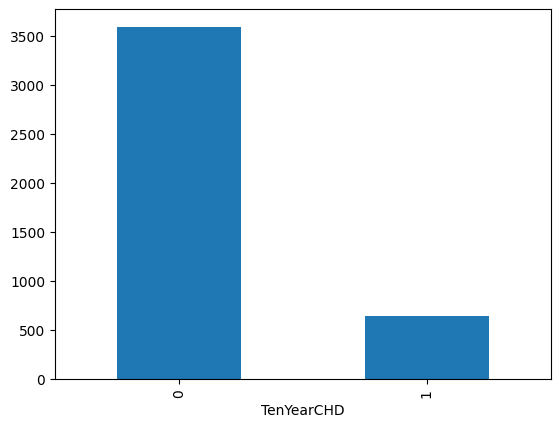

In [48]:
# check the data balance for TenYearCHD
df_new['TenYearCHD'].value_counts().plot.bar()

In [89]:
# since the data is imbalanced for dependent variable, 
# balance it using undersampling method
df_0 = df_new[df_new['TenYearCHD'] == 0]
df_1 = df_new[df_new['TenYearCHD'] == 1]

df_under = df_0.sample(644)

# create the final df
df_final = pd.concat([df_under, df_1], axis=0)

### Data Preprocessing

In [90]:
# split the data in X and Y
X = df_final[important_features]
Y = df_final['TenYearCHD']

In [91]:
from sklearn.model_selection import train_test_split

# split the data in train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=12345)

### model building

#### save the model

In [92]:
import pickle

def save_model(model, name):
    with open(name, 'wb') as file:
        pickle.dump(model, file)

#### SVM

In [93]:
def build_svm_model():
    from sklearn.svm import SVC
    model = SVC(C=2, kernel='rbf')
    model.fit(x_train, y_train)
    save_model(model, 'svm.pkl')
    return model

In [94]:
def build_lg_model():
    from sklearn.linear_model import LogisticRegressionCV
    model = LogisticRegressionCV()
    model.fit(x_train, y_train)
    save_model(model, 'lg.pkl')
    return model

In [95]:
def build_knn_model():
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=7)
    model.fit(x_train, y_train)
    save_model(model, 'knn.pkl')
    return model

In [96]:
def build_nb_model():
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(x_train, y_train)
    save_model(model, 'nb.pkl')
    return model

In [97]:
def build_dt_model():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(max_depth=500)
    model.fit(x_train, y_train)
    save_model(model, 'dt.pkl')
    return model

In [98]:
def build_rf_model():
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=500)
    model.fit(x_train, y_train)
    save_model(model, 'rf.pkl')
    return model

In [99]:
def build_catboost_model():
    from catboost import CatBoostClassifier
    model = CatBoostClassifier(verbose=False)
    model.fit(x_train, y_train)
    save_model(model, 'cb.pkl')
    return model

In [100]:
def build_xgb_model():
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model.fit(x_train, y_train)
    save_model(model, 'xgb.pkl')
    return model

#### Model Evaluation

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model):
    # define y_true and y_pred
    y_true = y_test
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1

In [102]:
model_metrics = []
model_functions = [
    {"name": "SVM", "function": build_svm_model},
    {"name": "LG", "function": build_lg_model},
    {"name": "KNN", "function": build_knn_model},
    {"name": "NB", "function": build_nb_model},
    {"name": "DT", "function": build_dt_model},
    {"name": "RF", "function": build_rf_model},
    {"name": "CatBoost", "function": build_catboost_model},
    {"name": "XGBoost", "function": build_xgb_model}
]

for model_info in model_functions:
    model = model_info['function']()
    accuracy, precision, recall, f1 = evaluate_model(model)
    model_metrics.append({
        "name": model_info['name'], 
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    })

for info in model_metrics:
    print(f"{info['name']:<10}| {info['accuracy']:^5} | {info['precision']:^5} | {info['recall']:^5} | {info['f1']:^5} ")

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

SVM       | 0.6149870801033591 | 0.6884057971014492 | 0.472636815920398 | 0.56047197640118 
LG        | 0.6356589147286822 | 0.6764705882352942 | 0.572139303482587 | 0.6199460916442048 
KNN       | 0.5478036175710594 | 0.5783132530120482 | 0.47761194029850745 | 0.5231607629427792 
NB        | 0.5529715762273901 | 0.6891891891891891 | 0.2537313432835821 | 0.37090909090909097 
DT        | 0.599483204134367 | 0.6095238095238096 | 0.6368159203980099 | 0.6228710462287105 
RF        | 0.6408268733850129 | 0.6684782608695652 | 0.6119402985074627 | 0.638961038961039 
CatBoost  | 0.6330749354005168 | 0.6629834254143646 | 0.5970149253731343 | 0.6282722513089004 
XGBoost   | 0.5813953488372093 | 0.6020942408376964 | 0.572139303482587 | 0.586734693877551 
